In [1]:
from __future__ import division, print_function
import pandas as pd
import pylab as pl
import scipy as sp
from scipy import stats
import numpy as np
from numpy import random
from scipy.stats import norm


%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# drawing 100 1000-element distributions from a standard normal

In [2]:
np.random.seed(999)

Ndraws, Nsamples = 100, 1000
ran_samples = np.empty((Ndraws, Nsamples))
for i in range(Nsamples):
    ran_samples[:, i] = np.random.randn(Ndraws)
    

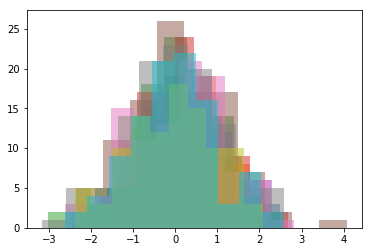

In [3]:
for i in np.linspace(0, Nsamples-1, 10):
    pl.hist(ran_samples[:, int(i)], alpha=0.5)

Figure 1: 100 samples, each of 1000 elements drawn from a standard normal distribution N(0,1), overplotted. 

# Calculating the z statistics

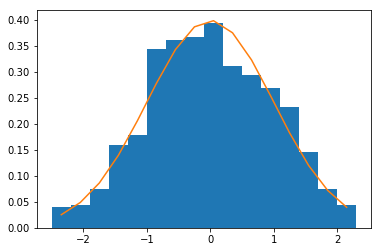

In [4]:
Ndraws, Nsamples = 100, 1000
ran_means = ran_samples.mean(axis=0)
bins = np.arange(-2.5, 2.5, 0.3)
hsbins = pl.hist(np.sqrt(Ndraws) * ran_means, bins=bins, normed=True)
xrange = hsbins[1][:-1] + 0.5 * (hsbins[1][1] - hsbins[1][0])
model = sp.stats.norm.pdf(hsbins[1][:-1] + 0.5 * (hsbins[1][1] - hsbins[1][0]));
pl.plot(xrange, model);


Figure 2: A histogram of the z statistics for the 100 samples above, z = sqrt(N) * sample_mean, note that the statistics reduces to this form since the population mean and standard deviations are 0 and 1 respectively. The z-statistics distribution is plotted in blue and a standard normal N(0,1) overplotted in orange. If the z test holds the standard distribution of z statistics should follow a standard normal.

# Fitting the z-statistics distribution with a Gaussian

## changing gaussian mean

In [5]:
def chisq(model, data):
    errors = np.sqrt(data)
    return ((model - data)**2 / errors**2).sum()
print (chisq(model, hsbins[0]))

0.0623710166014


In [7]:
chisqs = np.zeros(100)
for i,mu in enumerate(np.linspace(-2, 2, 100)):
    chisqs[i] = chisq(sp.stats.norm.pdf(hsbins[1][:-1] + 0.5 * 
                                        (hsbins[1][1] - hsbins[1][0]),
                            loc=mu), hsbins[0])


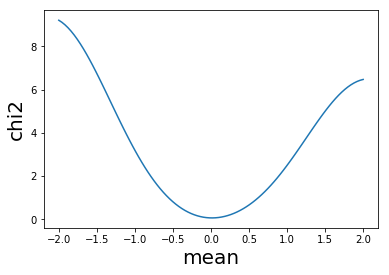

In [12]:
pl.plot(np.linspace(-2, 2, 100), chisqs)
pl.xlabel("mean", fontsize=20)
pl.ylabel("chi2", fontsize=20);

Figure 3: a plot of the chi square value, assuming Poisson errors,  for the fit of a Gaussian model to the distribution of z statistics shown in Figure 2, as a function of changing mean.

## changing gaussian mean and standard deviation

In [13]:
chisqs = np.zeros((100,100))
for i,mu in enumerate(np.linspace(-2, 2, 100)):
    for j,sig in enumerate(np.linspace(0.1, 3, 100)):
        chisqs[i,j] = chisq(sp.stats.norm.pdf(hsbins[1][:-1] + 0.5 * 
                                        (hsbins[1][1] - hsbins[1][0]),
                            loc=mu, scale=sig), hsbins[0])

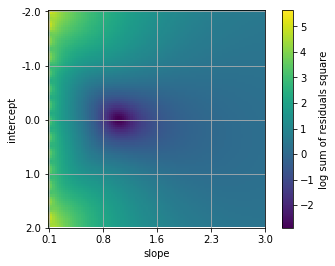

In [24]:
fig = pl.figure()
ax = fig.add_subplot(111)
ax.grid(True)
im = pl.imshow(np.log(chisqs.reshape(100,100)), interpolation='nearest')
cax = pl.colorbar()
xticks = np.linspace(0, 100, 5)
yticks = np.linspace(0, 100, 5)
ax.set_xticks(xticks)
ax.set_xticklabels(['%.1f'%f for f in np.linspace(0.1, 3, len(xticks))])
ax.set_yticks(yticks)
ax.set_yticklabels(['%.1f'%f for f in np.linspace(-2, 2, len(yticks))]);
cax.set_label("log sum of residuals square")
ax.set_xlabel("slope")
ax.set_ylabel(r"intercept");


FIgure 3: a plot of the chi square surface, assuming Poisson errors,for the fit of a Gaussian model to the distribution of z statistics shown in Figure 2, as a function of changing mean and standard distribution of the Gaussian model.